In [ ]:
import pandas as pd
import numpy as np

import datetime as dt
import pandas_market_calendars as mcal

from finquant.portfolio import build_portfolio

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interact

import matplotlib.pyplot as plt
 
#data = pd.read_csv("https://raw.githubusercontent.com/leosmigel/analyzingalpha/master/sp500-historical-components-and-changes/sp500_history.csv",index_col=0)

In [ ]:
cycles_ = ['Expansion','Slowdown','Recession','Recovery']

In [63]:
class sectors:

    def __init__(self, start_date = np.NaN, end_date = np.NaN):
        self.VANGUARD = \
            [ \
            "VGT", \
            "VHT", \
            "VCR", \
            "VOX", \
            "VFH", \
            "VIS", \
            "VDC", \
            "VPU", \
            "VAW", \
            "VNQ", \
            "VDE" \
            ]

        self.SPDR = \
            [ \
            "XLK", \
            "XLV", \
            "XLY", \
            "XLC", \
            "XLF", \
            "XLI", \
            "XLP", \
            "XLU", \
            "XLB", \
            "XLRE", \
            "XLE" \
            ]

        self.sectors = \
            [ \
            "Information Technology",\
            "Health Care",\
            "Consumer Discretionary",\
            "Communication Services",\
            "Financials",\
            "Industrials",\
            "Consumer Staples",\
            "Utilities",\
            "Materials",\
            "Real Estate",\
            "Energy"\
            ]

    def get_Vanguard(self):
        return(self.VANGUARD)

    def get_sectors(self):
        return(self.sectors)
    
    def get_SPDR(self):
        return(self.SPDR) 
    
class businessCycles:
    
    def __init__(self, start_date = np.NaN, end_date = np.NaN):
        
        self.Expansion = \
        ['Financials', 'Information Technology'],\
        ['Communication Services'],\
        ['Consumer Staples'],\
        ['Health Care','Utilities']

        self.Slowdown = \
        ['Consumer Staples', 'Health Care'],\
        ['Industrials'],\
        ['Materials'],\
        ['Consumer Discretionary','Real Estate']    
        
        self.Recession = \
        ['Consumer Staples', 'Utilities'],\
        ['Industrials'],\
        ['Materials'],\
        ['Real Estate','Information Technology']            
        
        self.Recovery = \
        ['Consumer Discretionary', 'Real Estate'],\
        ['Materials'],\
        ['Health Care'],\
        ['Consumer Staples','Utilities']         
        
    def get_data(self):
        return([self.Expansion, self.Slowdown, self.Recession, self.Recovery])
        
def chart(data_):
    
    sum_ = pd.DataFrame(np.sum(np.array(data_),axis=0)).T
    sum_.columns = data_.columns
    print(sum_/len(data_))

    bus_cycles = businessCycles()
    
    cycles = bus_cycles.get_data()

    for i in data_.index:
        print(i)
        x = data_.loc[i].sort_values(kind="quicksort", ascending=False)
        x_pos = x.index

        cc=['colors']*len(x.index)
        for n,val in enumerate(x):
            #print(n)
            if val<0:
                cc[n]='red'
            elif val>=0:
                cc[n]='blue'

        iter_ = 0
        #for c in cycles:
            #iter_ = iter_+1
            #print(c)
            #for i in c:
                #print(i)
                #for i_ in i:
                    #print(i_)
                    #print(x[i_])

                #print(x[c[i][0]])

        #plt.bar(x_pos, x,color=color_map(data_normalizer(likeability_scores)))
        plt.bar(x_pos, x,color = cc)

        #plt.xlabel("Energy Source")
        #plt.ylabel("Energy Output (GJ)")
        #plt.title("Energy output from various fuel sources")

        plt.xticks(range(0,len(x_pos)),x_pos, rotation = 75,size=10)

        plt.show()        

In [62]:
sectors_ = sectors()
print(sectors_.get_Vanguard())
print(sectors_.get_sectors())
print(sectors_.get_SPDR())



['VGT', 'VHT', 'VCR', 'VOX', 'VFH', 'VIS', 'VDC', 'VPU', 'VAW', 'VNQ', 'VDE']
['Information Technology', 'Health Care', 'Consumer Discretionary', 'Communication Services', 'Financials', 'Industrials', 'Consumer Staples', 'Utilities', 'Materials', 'Real Estate', 'Energy']
['XLK', 'XLV', 'XLY', 'XLC', 'XLF', 'XLI', 'XLP', 'XLU', 'XLB', 'XLRE', 'XLE']


Expansion
2
Slowdown
3
Recession
3
Recovery
2


   Information Technology  Health Care  Consumer Discretionary  \
0                 0.00181     0.004946               -0.000437   

   Communication Services  Financials  Industrials  Consumer Staples  \
0                0.004223     0.00709     0.001462          0.003194   

   Utilities  Materials  Real Estate    Energy     ^GSPC  
0   0.009495   0.004184     0.008396 -0.001342  0.004692  
0


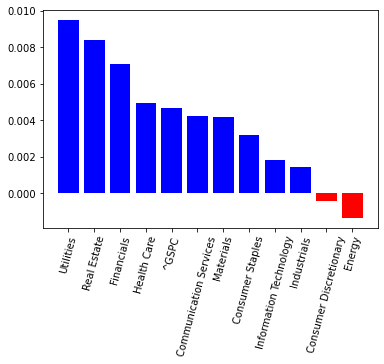

In [ ]:
stocks=sectors_.get_Vanguard()
names = sectors_.get_sectors()
stocks.append('^GSPC')
names.append('^GSPC')

In [ ]:
#stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
ls_key = 'Adj Close'

In [143]:
#filter_ = ['Y','6Mo','Q','M']
cutoff = dt.datetime.today().strftime('%Y-%m-%d')
#filter_ = ['Y','6Mo','Q','M']
filter_ = ['Y','Q']
periods = [2,3,4,5,6,7,8,9]

#filter_ = sum_.columns
def f3(Y,X):
    end_ = dt.datetime.strptime(cutoff, "%Y-%m-%d").date()

    process=True
    
    if Y=="Y":
        unit=52
    elif Y=="6Mo":
        unit=26*2
    elif Y=="Q":
        unit=13
    #elif Y=="M":
        #start_ = end_ - dt.timedelta(months=12*X)
        #process=False
        
    if process:
        start_ = end_ - dt.timedelta(weeks=unit*X)

    nyse = mcal.get_calendar('NYSE')

    #max lag due to indicators
    n = 26

    start = start_#date_time[0]
    early_start = (dt.datetime.strptime(start.strftime('%Y-%m-%d'), '%Y-%m-%d') - pd.tseries.offsets.Week(n=unit) - pd.tseries.offsets.BusinessDay(n = np.max([n])+5)).strftime('%Y-%m-%d')
    print(early_start)
    end = (dt.datetime.strptime(str(end_), '%Y-%m-%d') + pd.tseries.offsets.BusinessDay(n = 1)).strftime('%Y-%m-%d')#date_time[-1]
    print(end)

    early = nyse.schedule(start_date=early_start, end_date=end)

    #import pandas_datareader.data as web
    #f = web.DataReader(stocks, 'yahoo',early_start,end)

    pf_pre = build_portfolio(
        names=stocks, start_date=early_start, end_date=end, data_api="yfinance"
    )

    if Y=="Y":
        data_ = pf_pre.data.pct_change().asfreq('Y', method='pad').iloc[1:]
    else:
        data_ = pf_pre.data.pct_change().asfreq('Q', method='pad').iloc[1:]
    #templist = sectors_.get_sectors()
    data_.columns = names
    data_.index = data_.index.strftime('%Y-%m-%d')
    #Y = x
    #output_slider_variable.value
    #internalFilter = filter_.copy()
    #internalFilter.remove(Y)
    #all_data_ = pd.concat([data_[Y],data_[internalFilter]], axis=1)    
    #print(all_data_.describe())
    #display(all_data_.describe())
    chart(pd.DataFrame(data_.mean(axis=0)).T)
    
    for c in range(0,len(cycles)):

        print(cycles_[c])
        businessCycleScores = 0

        if np.mean(data_[cycles[c][0][0]])>np.mean(data_[cycles[c][1][0]]):
            businessCycleScores = businessCycleScores + 1
        if np.mean(data_[cycles[c][0][1]])>np.mean(data_[cycles[c][1][0]]):
            businessCycleScores = businessCycleScores + 1

        if np.mean(data_[cycles[c][1]])[0]>np.mean(data_[cycles[c][2]])[0]:#np.mean(data_[cycles[0][0][1]])
            businessCycleScores = businessCycleScores + 1

        if np.mean(data_[cycles[c][2]])[0]>np.mean(data_[cycles[c][3][0]]):
            businessCycleScores = businessCycleScores + 1    
        if np.mean(data_[cycles[c][2]])[0]>np.mean(data_[cycles[c][3][1]]):
            businessCycleScores = businessCycleScores + 1  

        print(businessCycleScores)    
        
    display(data_.style.background_gradient(cmap ='RdYlGn',axis=0))
    chart(data_)
    return(data_)

out = widgets.interact(f3, Y=filter_,X=years_)
#interactive(f3, Y=filter_,X=years_)

#output_slider_variable.observe(f4, 'value')

print("choose Y")
#display(out)
#out.observe(on_value_change, names='value')    
data_ = out.widget.result
#display(data_.style.background_gradient(cmap ='RdYlGn',axis=0))

interactive(children=(Dropdown(description='Y', options=('Y', 'Q'), value='Y'), Dropdown(description='X', opti…

choose Y


In [ ]:
'''
dates = sp500_adjustments['date'][sp500_adjustments['date']<=cutoff].unique()

for d in dates:
    print(d)
    
    #sp500_adjustments['variable']=="added_ticker"] && 
    adds = sp500_adjustments[((sp500_adjustments['date']<=d) & (sp500_adjustments['variable']=="added_ticker"))]
    add_names, add_counts = np.unique(adds.name, return_counts=True)

    dels = sp500_adjustments[((sp500_adjustments['date']<=d) & (sp500_adjustments['variable']=="removed_ticker"))]
    del_names, del_counts = np.unique(dels.name, return_counts=True)

    df = pd.concat([pd.concat([pd.DataFrame(add_names),pd.DataFrame(add_counts)],axis=1,ignore_index=1),pd.concat([pd.DataFrame(del_names),pd.DataFrame(del_counts*-1)],axis=1,ignore_index=1)],axis=0,ignore_index=1)
    df.columns = ['name','tally']
    
    grouper = df.groupby('name')
    #res = grouper.count()
    aggregate = grouper.tally.sum()

    sp500 = pd.DataFrame(aggregate[pd.DataFrame(aggregate).tally>0]).index
    #print(sp500)
    #print(len(sp500))
    
'''